# Density Based clustering - DBSCAN

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/_temp_CS-dataset.csv",sep='\t')
df.head()

,CustomerID,I,Iu,Imax,E
0,17850.0,1693,24,12.0,4.380532
1,13047.0,1355,106,32.0,6.481921
2,12583.0,5009,115,360.0,6.445631
3,13748.0,439,24,80.0,4.494680
4,15100.0,58,1,32.0,0.000000


## Transformation

In [58]:
#Eliminiamo il client id null per adesso poi non ci sarà
df=df[df["CustomerID"].notnull()]
del df['CustomerID']
df.head()

,I,Iu,Imax,E
0,1693,24,12.0,4.380532
1,1355,106,32.0,6.481921
2,5009,115,360.0,6.445631
3,439,24,80.0,4.494680
4,58,1,32.0,0.000000


In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#StandardScaler corrisponde allo z scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)
print(X[:5])

[[0.01013085 0.01282766 0.00192263 0.42281532]
 [0.0084153  0.05856107 0.00216912 0.62564451]
 [0.02696146 0.06358059 0.00621156 0.6221417 ]
 [0.00376608 0.01282766 0.00276069 0.43383311]
 [0.00183228 0.         0.00216912 0.        ]]


In [60]:
#imports
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [61]:
dbscan = DBSCAN(eps=0.15, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.15, min_samples=3)

In [62]:
dbscan.labels_[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [63]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0], dtype=int64), array([   7, 4365], dtype=int64))

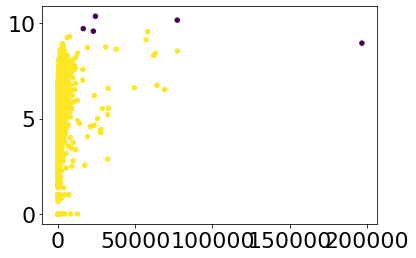

In [64]:
plt.scatter(df['I'], df['E'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Clustering Validation

In [65]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.8101516722337982


In [66]:
from scipy.spatial.distance import pdist, squareform

In [76]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[0.20792842 0.20641833 0.01275164 ... 0.21737655 0.4105132  0.19332988]

[[0.         0.20792842 0.20641833 ... 0.32662591 0.10955035 0.0843006 ]
 [0.20792842 0.         0.01994408 ... 0.53233135 0.31642259 0.12507304]
 [0.20641833 0.01994408 0.         ... 0.5299839  0.31482195 0.12548906]
 ...
 [0.32662591 0.53233135 0.5299839  ... 0.         0.21737655 0.4105132 ]
 [0.10955035 0.31642259 0.31482195 ... 0.21737655 0.         0.19332988]
 [0.0843006  0.12507304 0.12548906 ... 0.4105132  0.19332988 0.        ]]


In [77]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

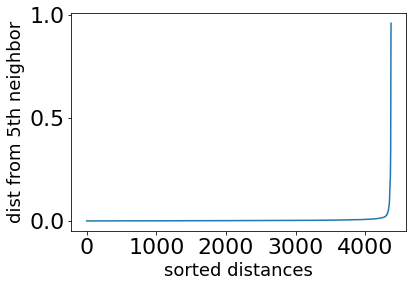

In [78]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()